# Comparisons between different approaches to solve the Bin-Packing problem in a streaming model

Since the Bin-Packing instances we found on the internet are not big enough to be considered as "Big Data", we created the data ourselves.
The way we create the instances is by simply sampling $k$ values uniformly distributed between 0 and 1.
We then consider that all bin sizes are equal to 1.
To have also different types of datasets, we also considered other approaches where we square and take the square root of the size from the previous method to make it such that there are respectivly more small/big items

In [2]:
import random
from FirstFit import firstFit
from streaming_BP import *
import matplotlib.pyplot as plt
import tracemalloc
import sys
import time

def createIteratorUniform(nb_items=100000, seed=12345):
    def next_item():
        random.seed(seed)
        for _ in range(nb_items):
            yield random.random()
    return next_item

def createIteratorUniformSquared(nb_items=100000, seed=12345):
    def next_item():
        random.seed(seed)
        for _ in range(nb_items):
            yield random.random()**2
    return next_item

def createIteratorUniformRoot(nb_items=100000, seed=12345):
    def next_item():
        random.seed(seed)
        for _ in range(nb_items):
            yield random.random()**(1/2)
    return next_item

Let's first look at the distribution of the item sizes for the different distributions

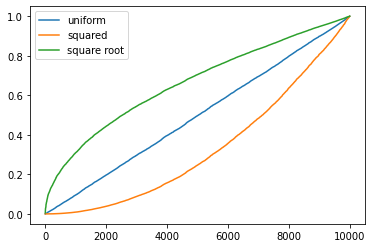

In [3]:
uniform = [i for i in createIteratorUniform(10000)()]
squared = [i for i in createIteratorUniformSquared(10000)()]
rooted = [i for i in createIteratorUniformRoot(10000)()]
uniform.sort()
squared.sort()
rooted.sort()
plt.plot(uniform, label="uniform")
plt.plot(squared, label="squared")
plt.plot(rooted, label="square root")
plt.legend()
plt.show()

Now let us take a look at the memory size taken by different formulation for problems of different size.

As formulation for first fit, we simply consider a list containing all items.

High multiplicity bin packing problem (aka cutting stock problem) created with 88 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 106 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 960 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 543 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 78 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 124 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 1052 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 649 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 82 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) 

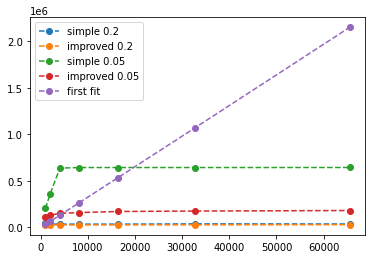

In [3]:
problemSize = []
firstfit_ = []
simplerounding_02 = []
improvedrounding_02 = []
simplerounding_005 = []
improvedrounding_005 = []

for i in range(10, 17):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    [item for item in createIteratorUniform(nb_items)()]
    memoryMax = tracemalloc.get_traced_memory()[1]
    firstfit_.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    simpleRoundingModel(createIteratorUniform(nb_items), 0.2)
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_02.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    improvedRoundingModel(createIteratorUniform(nb_items), 0.2)
    memoryMax = tracemalloc.get_traced_memory()[1]
    improvedrounding_02.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    simpleRoundingModel(createIteratorUniform(nb_items), 0.05)
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_005.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    improvedRoundingModel(createIteratorUniform(nb_items), 0.05)
    memoryMax = tracemalloc.get_traced_memory()[1]
    improvedrounding_005.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, simplerounding_02, '--o', label="simple 0.2")
plt.plot(problemSize, improvedrounding_02, '--o', label="improved 0.2")
plt.plot(problemSize, simplerounding_005, '--o', label="simple 0.05")
plt.plot(problemSize, improvedrounding_005, '--o', label="improved 0.05")
plt.plot(problemSize, firstfit_, '--o', label="first fit")
plt.legend()
plt.show()

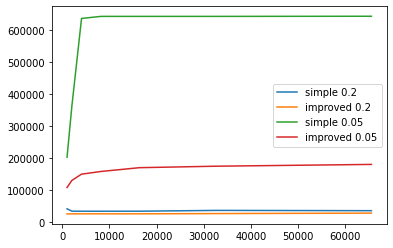

In [4]:
plt.plot(problemSize, simplerounding_02, label="simple 0.2")
plt.plot(problemSize, improvedrounding_02, label="improved 0.2")
plt.plot(problemSize, simplerounding_005, label="simple 0.05")
plt.plot(problemSize, improvedrounding_005, label="improved 0.05")
plt.legend()
plt.show()

A first thing we notice is that the space required for the regular representation is as expected linear.
The space required for the rounded instances, which are $1+\epsilon$ approximations of the original instances on the other hand seems constant once a certain threshold is attained.

This is quite surprising, as the space complexity is supposed to be $O(\frac{1}{\epsilon} \cdot \log(\frac{1}{\epsilon}) \cdot \log(\text{OPT}))$.

We then looked at the space complexity of the quantile's algorithm which is $O(\frac{1}{\delta} \log(\delta N))$ (where $N$ is the number of items added and $\delta$ is the quantile's precision) in the worst case.
This is indeed a worst case complexity and in practice Michael Greenwald and Sanjeev Khanna (the creators of the Greenwald-Khanna quantile summary) noticed that unless the input was specifically made hard, their quantile summary performed usually much better than the worst case complexity, as happens in our case (they actually tested random, ordered and hard inputs).

We can also see that indeed, the improved rounding performs better than the simple rounding. In fact by comparing both methods, we can see that when an $\epsilon$ value of 0.5 is used, both methods are exactly the same (as the improved rounding will only use one quantile with same $\delta$ as the simple rounding).
For an epsilon value of 0.2, we can see that the improved rounding takes less space in memory, although, the final formulation uses more items which will lead to slower solving of the BP problem in the end as we will see later.
Finally for an epsilon value of 0.05, the improved rounding performs much better as well as in total space used as in the number of items in the resulting formulation.

Below we also compare sorted data to random data simply to see if there would be any difference.

High multiplicity bin packing problem (aka cutting stock problem) created with 1 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 2 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 3 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 3 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 5 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 6 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 10 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 12 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 22 different item sizes
High multiplicity bin packing problem (aka cutting stock problem) created with 

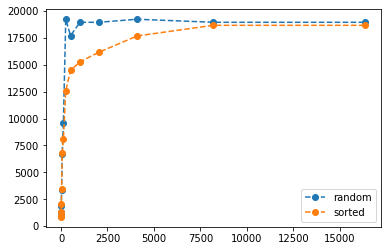

In [8]:
def createIteratorUniformSorted(nb_items=100000, seed=12345):
    def next_item():
        for i in range(1, nb_items+1):
            yield i / nb_items
    return next_item

problemSize = []
firstfit_ = []
simplerounding_normal = []
simplerounding_sorted = []

for i in range(1, 15):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    simpleRoundingModel(createIteratorUniform(nb_items), 0.25)
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_normal.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    simpleRoundingModel(createIteratorUniformSorted(nb_items), 0.25)
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_sorted.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, simplerounding_normal, '--o', label="random")
plt.plot(problemSize, simplerounding_sorted, '--o', label="sorted")
plt.legend()
plt.show()

We wil now analyse the memory used by the whole process, which is creating the $(1+\epsilon)$ approximation model and solving it.
We will compare this model to the first fit model.
Note that the goal of the article was to provide a summary of the bin packing problem using a small amount of space so that one can derive a $1+\epsilon$ estimate of the optimal number of bins.
The main objective was the accuracy-space trade-off, where space bounds both the memory of the streaming algorithm and the size of the summary.
The focus was therefore not on the estimation part, that is, given the summary, how exactly to estimate the optimal number of bins of the original instance.
Some examples of algorithms that could be used were given in the article, but the space complexity of these algorithms was not counted towards the sapce complexity mentioned, meaning that the obtained results might be different.

The algorithm we decided to use to solve the high multiplicity bin packing problem is the column generation introduced by Gilmore and Gomory.
Note that the entire column generation + branch and bound is not done, only the column generation part is done and the relaxation of the problem is then solved, resulting in an OPT + $\sigma$ approximation of OPT where $\sigma$ is the number of different item sizes.

The practical implementation of the column generation is done by simply building the master and slave models and then give them as input to the glpk solver. This solver should be worse than other commercial solvers, but has the advantage of being free.

First fit used 4193 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 76 different item sizes
I_R used 4162 bins
Instance used 4366 bins in total
High multiplicity bin packing problem (aka cutting stock problem) created with 99 different item sizes
I_R used 4203 bins
Instance used 4406 bins in total
First fit used 8308 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 81 different item sizes
I_R used 8297 bins
Instance used 8715 bins in total
High multiplicity bin packing problem (aka cutting stock problem) created with 91 different item sizes
I_R used 8357 bins
Instance used 8773 bins in total
First fit used 16631 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 76 different item sizes
I_R used 16707 bins
Instance used 17525 bins in total
High multiplicity bin packing problem (aka cutting stock problem) created with 89 different item sizes
I_R used 16786 bins
Instance used 17608 bins

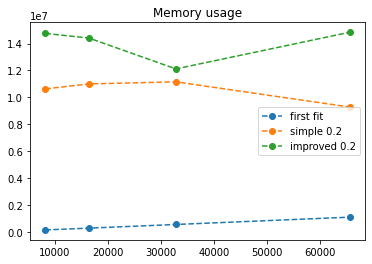

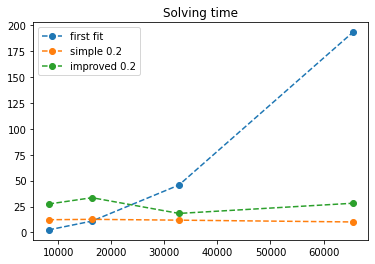

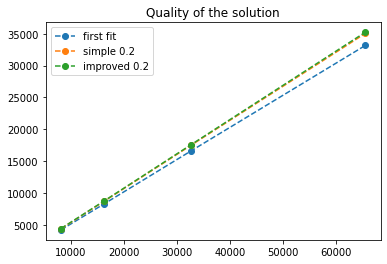

In [3]:
problemSize = []

firstfit_memory = []
firstfit_solution = []
firstfit_time = []

simplerounding_memory = []
simplerounding_solution = []
simplerounding_time = []

improvedrounding_memory = []
improvedrounding_solution = []
improvedrounding_time = []

for i in range(13, 17):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    starttime = time.time()
    firstfit_solution.append(firstFit(createIteratorUniform(nb_items)))
    memoryMax = tracemalloc.get_traced_memory()[1]
    firstfit_time.append(time.time() - starttime)
    firstfit_memory.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    starttime = time.time()
    simplerounding_solution.append(simpleRounding(createIteratorUniform(nb_items), 0.2))
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_time.append(time.time() - starttime)
    simplerounding_memory.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    starttime = time.time()
    improvedrounding_solution.append(improvedRounding(createIteratorUniform(nb_items), 0.2))
    memoryMax = tracemalloc.get_traced_memory()[1]
    improvedrounding_time.append(time.time() - starttime)
    improvedrounding_memory.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, firstfit_memory, '--o', label="first fit")
plt.plot(problemSize, simplerounding_memory, '--o', label="simple 0.2")
plt.plot(problemSize, improvedrounding_memory, '--o', label="improved 0.2")
plt.legend()
plt.title("Memory usage")
plt.show()

plt.plot(problemSize, firstfit_time, '--o', label="first fit")
plt.plot(problemSize, simplerounding_time, '--o', label="simple 0.2")
plt.plot(problemSize, improvedrounding_time, '--o', label="improved 0.2")
plt.legend()
plt.title("Solving time")
plt.show()

plt.plot(problemSize, firstfit_solution, '--o', label="first fit")
plt.plot(problemSize, simplerounding_solution, '--o', label="simple 0.2")
plt.plot(problemSize, improvedrounding_solution, '--o', label="improved 0.2")
plt.legend()
plt.title("Quality of the solution")
plt.show()

The graphs shown have only few values because the first fit time complexity seems to be well above linear and that solving this problem with only $2^{16} = 65536$ items already takes about 200 seconds and that $2^{17}$ would probably take over 15 minutes.

Although we can already see some trends.

First we notice that the results obtained using the streaming algorithm with $\epsilon = 0.2$ are relatively close to the ones obtained by using first fit, in this case they always are between 4-6% of the solution returned by first fit.

We can then see that the time used to solve first fit is linear with the problem's size and that it quickly becomes a problem for big instances. For example in this partcular case, the biggest instance used $2^{16} = 65536$ items and it took over 3 minutes to solve, while in the case of simple rounding, we are always below 25 seconds.

As for the memory usage, it is not very clear, but first fit uses memory linear with the size of the problem. The simple rounding algorithm interestingly uses less memory for more complex problems. This is because as we can see in the output, the more complex problems have less different sizes, the slave problem - which is the bottleneck of the column generation because it is a mixed integer program which we need to solve optimally (as opposed to the master problem for which we only need to solve the linear relaxation) - has as many integer variables as there are different item sizes. Having less item sizes therefore simplifies the program and uses less memory.
Lastly we can also see that while the formulation of the improved rounding takes less space, solving this formulation is much more demanding as it has more different item sizes.
In the following, we will therefore only use the simple rounding.

We also mention that the value of $\epsilon$ was chosen for computational reasons. With such a value, the time taken to solve the problem is acceptable, we managed to solve some problems with values of 0.18 and 0.15 too, after a few minutes, but for an $\epsilon$ value of 0.1, we were not patient enough to wait for an answer.

In [9]:
# Show the proportional difference between first fit and simple rounding
print([simplerounding_solution[i] / firstfit_solution[i] for i in range(len(firstfit_solution))])

[1.0410207488671595, 1.0489889263360617, 1.0538151644519271, 1.057388419782871]


We also tried using gurobi instead of glpk, under windows and not WSL for problem sizes of $2^{14}, 2^{15}, 2^{16}$

The solutions returned were exactly the same, ideally, this would be the case, but in practice, MIP solvers sometimes accept non optimal solutions if they are within a certain range of the real optimal solution that is still unknown and this could lead to different solutions but this was not the case.

The time used by gurobi was suprisingly bigger, it was each time between 10-15% slower.

The memory used on the other hand was slightly lower, glpk used respectively 9.6%, 12.0% and 17.0% more memory than gurobi. 

Note that the version of python(3.8.10/3.10.4), the OS (WSL/Windows) and the way of testing environment (notebook/terminal) were different and that this could lead to these slight differences, we will therefore assume that both glpk and gurobi are approximately equivalent.

In [18]:
print(firstfit_memory)
firstfit_memory_coeff = [firstfit_memory[i] / 2**(i+13) for i in range(len(firstfit_memory))]
print(firstfit_memory_coeff)

print(simplerounding_memory)

[137592, 267881, 536892, 1074261]
[16.7958984375, 16.35015869140625, 16.3846435546875, 16.391921997070312]
[10666888, 11119483, 8982796, 8813237]


As we can see from the results above, the memory used by first fit seems to be linear in the problem's size and therefore doubles each time.
We then see that the coefficient is around 16. We can then deduce that the first fit algorithm should use more than 10.000.000 bytes of memory around instances of size 625.000.
These 10.000.000 bytes of memory is also approximately the memory used by the simple rounding algorithm.

We could then test the simple rounding with for example 1.000.000 items to see how well it performs.

In [19]:
tracemalloc.start()
starttime = time.time()
sol = simpleRounding(createIteratorUniform(1000000), 0.2)
mem = tracemalloc.get_traced_memory()[1]
time_ = time.time() - starttime
tracemalloc.stop()

print("{} bytes of memory used".format(mem))
print("Lasted {} seconds".format(time_))

High multiplicity bin packing problem (aka cutting stock problem) created with 74 different item sizes
I_R used 512136 bins
Instance used 536892 bins in total
10274477 bytes of memory used
Lasted 57.00535488128662 seconds


We can see that this problem, that would be unsolvable using first fit because of the time complexity, was here solved in less than a minute with an error margin of around 20% usiong less memory than what first fit would have used.
First fit would have used around 16*1000000 bytes which is 16 MB, while we only used 10 MB here.
We also know that even though the solution found is only within 20% of the optimal solution, it would be around 4-6% of the solution returned by first fit.

In [20]:
tracemalloc.start()
starttime = time.time()
sol = simpleRounding(createIteratorUniform(100000000), 0.2)
mem = tracemalloc.get_traced_memory()[1]
time_ = time.time() - starttime
tracemalloc.stop()

print("{} bytes of memory used".format(mem))
print("Lasted {} seconds".format(time_))

High multiplicity bin packing problem (aka cutting stock problem) created with 73 different item sizes
I_R used 51132216 bins
Instance used 53593701 bins in total
7749836 bytes of memory used
Lasted 656.5965461730957 seconds


In fact we can even create models that are stupidly huge like in this case a model with 100000000 (100 milion) items, and we would still get a solution in some reasonable amount of time.

In fact when the model becomes so huge, the majority of the time is used for generation the random numbers and inserting them in the GK quantile summary and not solving the high multiplicity BP problem.

The slave problem of the CG is the most challenging part of the algorithm. An alternative would be to use dynamic programming. Unfortunately DP does not work with items that are fractional.
We then thought of multiplying each item by say 10.000 and to then round them up. We do not know if we could then bound the quality of the solution by doing this.
In any case if we do this, for some small enough multiplier/epsilon, this would mean that the original problem is already a instance of a high multiplicity BP problem, which is the reason we did not use it.
But in general the space complexity of DP is relative to the size of the bins, which could greatly improve the algorithm if this size was chosen small enough.

## Some additional tests

Here we simply reiterate the tests already done, but with different distributions.

Squared:

First fit used 2722 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 78 different item sizes
I_R used 2594 bins
Instance used 2895 bins in total
First fit used 5456 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 79 different item sizes
I_R used 5189 bins
Instance used 5798 bins in total
First fit used 10937 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 76 different item sizes
I_R used 10406 bins
Instance used 11625 bins in total
First fit used 21840 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 76 different item sizes
I_R used 20784 bins
Instance used 23233 bins in total


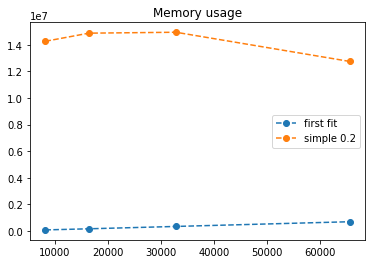

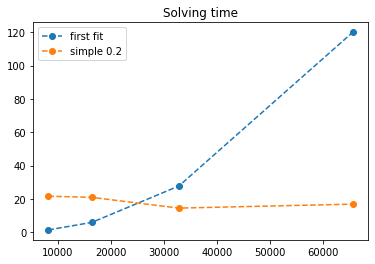

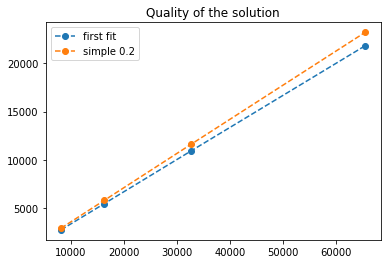

In [10]:
problemSize = []

firstfit_memory = []
firstfit_solution = []
firstfit_time = []

simplerounding_memory = []
simplerounding_solution = []
simplerounding_time = []

improvedrounding_memory = []
improvedrounding_solution = []
improvedrounding_time = []

for i in range(13, 17):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    starttime = time.time()
    firstfit_solution.append(firstFit(createIteratorUniformSquared(nb_items)))
    memoryMax = tracemalloc.get_traced_memory()[1]
    firstfit_time.append(time.time() - starttime)
    firstfit_memory.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    starttime = time.time()
    simplerounding_solution.append(simpleRounding(createIteratorUniformSquared(nb_items), 0.2))
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_time.append(time.time() - starttime)
    simplerounding_memory.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, firstfit_memory, '--o', label="first fit")
plt.plot(problemSize, simplerounding_memory, '--o', label="simple 0.2")
plt.legend()
plt.title("Memory usage")
plt.show()

plt.plot(problemSize, firstfit_time, '--o', label="first fit")
plt.plot(problemSize, simplerounding_time, '--o', label="simple 0.2")
plt.legend()
plt.title("Solving time")
plt.show()

plt.plot(problemSize, firstfit_solution, '--o', label="first fit")
plt.plot(problemSize, simplerounding_solution, '--o', label="simple 0.2")
plt.legend()
plt.title("Quality of the solution")
plt.show()

Square root:

First fit used 6150 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 74 different item sizes
I_R used 6233 bins
Instance used 6233 bins in total
First fit used 12242 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 71 different item sizes
I_R used 12397 bins
Instance used 12397 bins in total
First fit used 24558 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 74 different item sizes
I_R used 24806 bins
Instance used 24806 bins in total
First fit used 49079 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 73 different item sizes
I_R used 49560 bins
Instance used 49560 bins in total


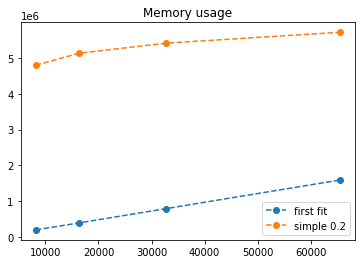

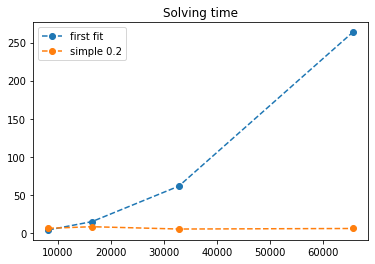

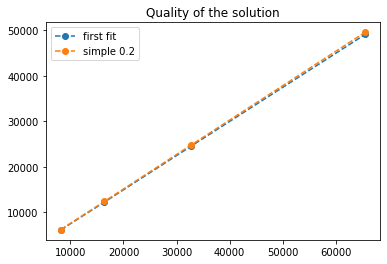

In [5]:
problemSize = []

firstfit_memory = []
firstfit_solution = []
firstfit_time = []

simplerounding_memory = []
simplerounding_solution = []
simplerounding_time = []

improvedrounding_memory = []
improvedrounding_solution = []
improvedrounding_time = []

for i in range(13, 17):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    starttime = time.time()
    firstfit_solution.append(firstFit(createIteratorUniformRoot(nb_items)))
    memoryMax = tracemalloc.get_traced_memory()[1]
    firstfit_time.append(time.time() - starttime)
    firstfit_memory.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    starttime = time.time()
    simplerounding_solution.append(simpleRounding(createIteratorUniformRoot(nb_items), 0.2))
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_time.append(time.time() - starttime)
    simplerounding_memory.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, firstfit_memory, '--o', label="first fit")
plt.plot(problemSize, simplerounding_memory, '--o', label="simple 0.2")
plt.legend()
plt.title("Memory usage")
plt.show()

plt.plot(problemSize, firstfit_time, '--o', label="first fit")
plt.plot(problemSize, simplerounding_time, '--o', label="simple 0.2")
plt.legend()
plt.title("Solving time")
plt.show()

plt.plot(problemSize, firstfit_solution, '--o', label="first fit")
plt.plot(problemSize, simplerounding_solution, '--o', label="simple 0.2")
plt.legend()
plt.title("Quality of the solution")
plt.show()

Sorted and uniform:

First fit used 5284 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 69 different item sizes
I_R used 4173 bins
Instance used 4376 bins in total
First fit used 10567 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 68 different item sizes
I_R used 8342 bins
Instance used 8744 bins in total
First fit used 21134 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 70 different item sizes
I_R used 16715 bins
Instance used 17523 bins in total
First fit used 42267 bins
High multiplicity bin packing problem (aka cutting stock problem) created with 70 different item sizes
I_R used 33579 bins
Instance used 35179 bins in total


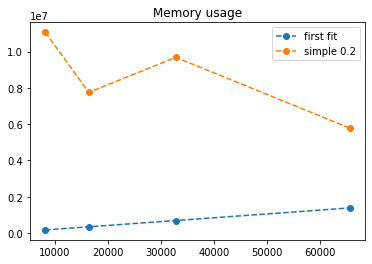

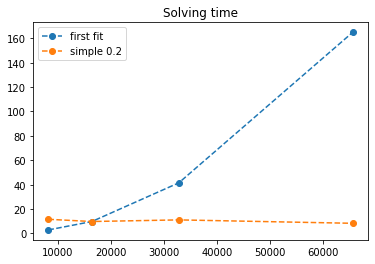

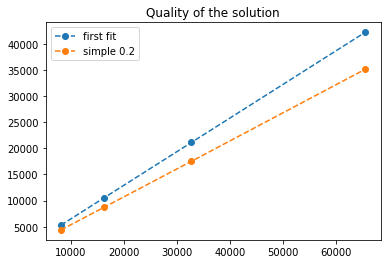

In [9]:
problemSize = []

firstfit_memory = []
firstfit_solution = []
firstfit_time = []

simplerounding_memory = []
simplerounding_solution = []
simplerounding_time = []

improvedrounding_memory = []
improvedrounding_solution = []
improvedrounding_time = []

for i in range(13, 17):
    nb_items = 2**i
    problemSize.append(nb_items)

    tracemalloc.start()
    starttime = time.time()
    firstfit_solution.append(firstFit(createIteratorUniformSorted(nb_items)))
    memoryMax = tracemalloc.get_traced_memory()[1]
    firstfit_time.append(time.time() - starttime)
    firstfit_memory.append(memoryMax)
    tracemalloc.stop()

    tracemalloc.start()
    starttime = time.time()
    simplerounding_solution.append(simpleRounding(createIteratorUniformSorted(nb_items), 0.2))
    memoryMax = tracemalloc.get_traced_memory()[1]
    simplerounding_time.append(time.time() - starttime)
    simplerounding_memory.append(memoryMax)
    tracemalloc.stop()

plt.plot(problemSize, firstfit_memory, '--o', label="first fit")
plt.plot(problemSize, simplerounding_memory, '--o', label="simple 0.2")
plt.legend()
plt.title("Memory usage")
plt.show()

plt.plot(problemSize, firstfit_time, '--o', label="first fit")
plt.plot(problemSize, simplerounding_time, '--o', label="simple 0.2")
plt.legend()
plt.title("Solving time")
plt.show()

plt.plot(problemSize, firstfit_solution, '--o', label="first fit")
plt.plot(problemSize, simplerounding_solution, '--o', label="simple 0.2")
plt.legend()
plt.title("Quality of the solution")
plt.show()